In [1]:
import warnings

from matplotlib import pyplot as plt
import numpy as np

from kn_cosmo import lightcurves, utils

In [2]:
warnings.filterwarnings('ignore')

# Dhawan models

In [3]:
# default parameters of GW170817
bulla_kne_lightcurve = lightcurves.DhawanLightcurve()

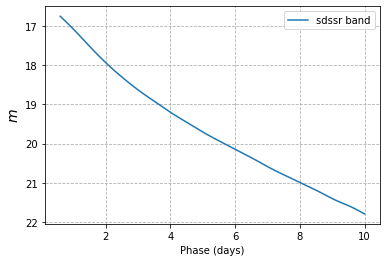

In [4]:
phases = np.linspace(0.5, 10, 100)
bulla_kne_lightcurve.plot_lightcurve('sdssr', phases)

# Kasen models

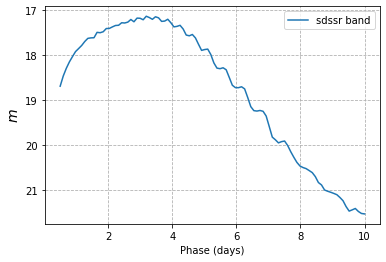

In [5]:
# default parameters of GW170817
kasen_kne_lightcurve = lightcurves.KasenLightCurve()
kasen_kne_lightcurve.plot_lightcurve('sdssr', phases)

# Custom source using `sncosmo.TimeSeriesSource`

In [6]:
from astropy import coordinates, units as u
from sncosmo import TimeSeriesSource

In [7]:
# supply a filename containing SED in the Bulla SED format
sed_filename = '../kn_cosmo/data/best-fit-AT-2017-gfo.txt'
waves_fluxes = np.loadtxt(sed_filename)

waves = waves_fluxes.T[0] * u.AA
fluxes = waves_fluxes[:, 1:].T * u.erg / (u.s*u.cm**2*u.AA)

t_i = 0.25
t_f = 15.25
n_time = 30
phases = [t_i + (0.5 + count) * (t_f - t_i) / n_time for count in range(n_time)]

In [8]:
source = TimeSeriesSource(
    phases, waves.value, fluxes.value,
    zero_before=True
)

In [9]:
bulla_kne_lightcurve = lightcurves.DhawanLightcurve(
    source, -16., 0.02, 0., coordinates.SkyCoord('02:42:40.771', '-00:00:47.84', unit=(u.hour, u.deg)),
    delta_t_minus=-2., delta_t_plus=12.
)

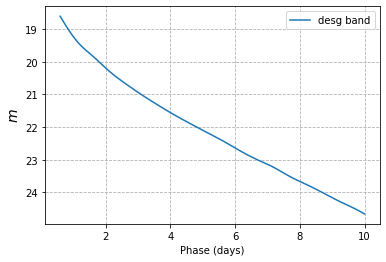

In [10]:
bulla_kne_lightcurve.plot_lightcurve('desg', np.linspace(0.5, 10, 100))